In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#### Función de Hill para activadores

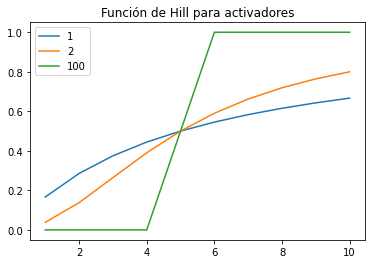

In [2]:
K, n, T = 5, (1, 2, 100), range(1,11)
eq1 = [i**n[0] / (K**n[0] + i**n[0]) for i in T]
eq2 = [i**n[1] / (K**n[1] + i**n[1]) for i in T]
eq3 = [i**n[2] / (K**n[2] + i**n[2]) for i in T]

plt.figure()
labels = '1', '2', '100'
plt.plot(T, eq1, label = labels[0])
plt.plot(T, eq2, label = labels[1])
plt.plot(T, eq3, label = labels[2])
plt.legend(loc="upper left")
plt.title('Función de Hill para activadores')
plt.show()

#### Función de Hill para represores

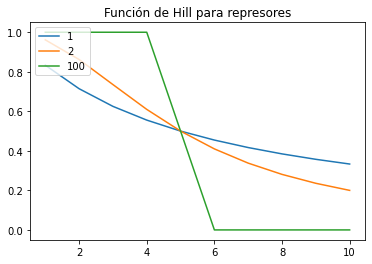

In [3]:
eq1 = [K**n[0] / (K**n[0] + i**n[0]) for i in T]
eq2 = [K**n[1] / (K**n[1] + i**n[1]) for i in T]
eq3 = [K**n[2] / (K**n[2] + i**n[2]) for i in T]

plt.figure()
labels = '1', '2', '100'
plt.plot(T, eq1, label = labels[0])
plt.plot(T, eq2, label = labels[1])
plt.plot(T, eq3, label = labels[2])
plt.legend(loc="upper left")
plt.title('Función de Hill para represores')
plt.show()

#### odeint con represor

In [4]:
def getEqs(x, t):
    x1, x2, x3, x4 = x
    dxdt=[0, 0, k*((x1**n_i)/(x1**n_i + K**n_i))*x2-k*x3+k, k*x3-gamma_p*x4]
    return dxdt

k = 0.02
gamma_p = 0.01
times = 100
x0 = [2, 2, 0.3, 0]
t = np.linspace(0, times)
Us = []
for n_i in n:
    Us.append(odeint(getEqs, x0, t))

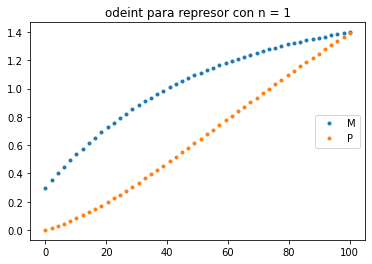

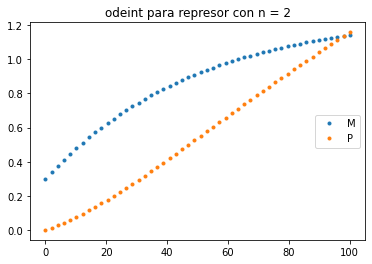

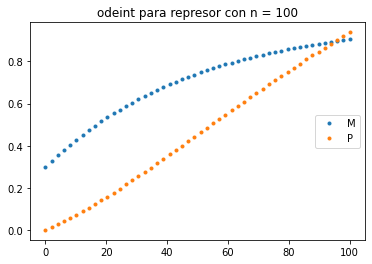

In [5]:
# No ploteo D y T porque me aumentan el eje Y del gráfico y se aprecian menos las diferencias

labels = ["D", "T", "M", "P"]
for j in range(3):
    plt.figure()  
    for i in range(2,4):
        plt.plot(t, Us[j][:,i], '.', label = labels[i])
    plt.legend(loc="center right")
    plt.title(f'odeint para represor con n = {n[j]}')
    plt.show()

### Task: dos proteínas, la primera reprime la expresión de la segunda y viceversa (feedback)

In [6]:
K, n, T = 5, (1, 2, 100), range(1,11)

def getEqs(x, t):
    x1, x3, x4, x5, x6 = x
    dxdt=[0, k*((x6**n_i)/(x6**n_i + K**n_i))-k*x3+k, k*x3-gamma_p*x4, k*((x4**n_i)/(x4**n_i + K**n_i))-k*x3+k, k*x5-gamma_p*x6]
    return dxdt

k = 0.02
gamma_p = 0.01
times = 100
x0 = [2, 0.3, 0, 0, 0]
t = np.linspace(0, times)
Us = []
for n_i in n:
    Us.append(odeint(getEqs, x0, t))

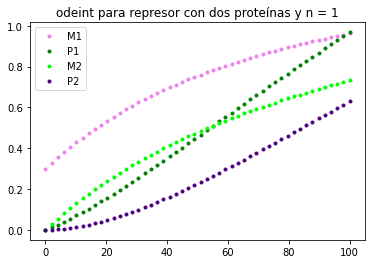

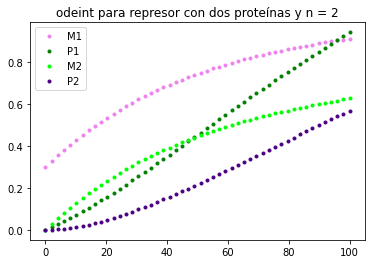

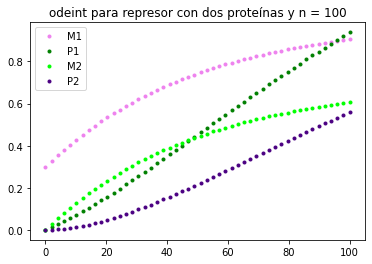

In [7]:
# No ploteo D y T porque me aumentan el eje Y del gráfico y se aprecian menos las diferencias

labels = ["D", "M1", "P1", "M2", "P2"]
colors = ["green", "lime", "indigo", "violet"]
for j in range(len(n)):
    plt.figure()  
    for i in range(1,5):
        plt.plot(t, Us[j][:,i], '.', label = labels[i], color = colors[i-2])
    plt.legend(loc="upper left")
    plt.title(f'odeint para represor con dos proteínas y n = {n[j]}')
    plt.show()